In [1]:
import json
import numpy as np
import pandas as pd

In [2]:
FOLDS = 4

In [3]:
mesa_ids = pd.read_csv('../wearsed/dataset/data_ids/mesa_ids_somnolyzer.csv')

In [4]:
print(len(mesa_ids))

1887


In [5]:
np.random.seed(10)
class_0 = mesa_ids[mesa_ids['ahi_severity_class'] == 0]['id'].values
np.random.shuffle(class_0)
train_set_size = round(len(class_0) * 0.75)
train_set, test_set = class_0[:train_set_size], class_0[train_set_size:]

print(sorted([int(x) for x in train_set]))
print(sorted([int(x) for x in test_set]))

[101, 111, 159, 167, 204, 251, 258, 295, 323, 339, 393, 419, 445, 458, 469, 501, 509, 563, 583, 586, 632, 636, 688, 762, 768, 837, 854, 862, 899, 926, 928, 949, 967, 971, 1018, 1022, 1048, 1068, 1074, 1177, 1298, 1389, 1413, 1570, 1577, 1670, 1684, 1717, 1772, 1789, 1842, 1850, 1884, 2042, 2049, 2169, 2175, 2206, 2280, 2300, 2337, 2413, 2459, 2473, 2549, 2582, 2616, 2632, 2670, 2677, 2681, 2696, 2723, 2828, 2846, 2862, 2868, 2913, 2932, 2952, 2987, 2988, 2996, 3061, 3113, 3211, 3257, 3259, 3298, 3336, 3369, 3426, 3477, 3508, 3520, 3560, 3570, 3598, 3664, 3689, 3717, 3771, 3803, 3925, 3993, 4070, 4091, 4109, 4117, 4152, 4296, 4352, 4432, 4436, 4575, 4618, 4623, 4658, 4667, 4729, 4782, 4815, 4831, 4842, 4846, 4860, 4861, 4892, 4935, 4969, 4994, 5119, 5131, 5219, 5243, 5292, 5318, 5390, 5450, 5463, 5479, 5513, 5514, 5529, 5551, 5606, 5622, 5658, 5669, 5673, 5704, 5748, 5754, 5780, 5784, 5869, 5876, 5891, 5906, 5921, 5947, 5980, 5993, 6011, 6071, 6075, 6097, 6131, 6132, 6155, 6300, 6308, 6

In [6]:
class_folds = {}
for class_id in range(4):
    class_values = mesa_ids[mesa_ids['ahi_severity_class'] == class_id]['id'].values
    np.random.shuffle(class_values)
    folds = []
    fold_size = len(class_values) // FOLDS
    for fold_nr in range(FOLDS):
        folds.append(sorted([int(x) for x in class_values[fold_nr*fold_size:(fold_nr+1)*fold_size]]))
    class_folds[class_id] = folds

In [7]:
for class_id in range(4):
    print(class_id)
    for i in range(4):
        print(class_folds[class_id][i])

0
[167, 251, 258, 415, 427, 501, 563, 862, 893, 926, 928, 949, 971, 1018, 1298, 1742, 2066, 2206, 2602, 2632, 2670, 2723, 2792, 2846, 3135, 3211, 3298, 3389, 3431, 3442, 3477, 3520, 3570, 3771, 3787, 3861, 4109, 4117, 4367, 4432, 4461, 4715, 4935, 5072, 5127, 5390, 5450, 5514, 5529, 5673, 5677, 5842, 6132, 6155, 6308, 6331, 6340, 6370, 6476, 6621, 6759]
[101, 288, 295, 393, 408, 586, 632, 762, 837, 1048, 1068, 1389, 1413, 1684, 1772, 1789, 1842, 1884, 2042, 2049, 2094, 2300, 2337, 2659, 2946, 2996, 3113, 3257, 3259, 3413, 3560, 3664, 3689, 3815, 3925, 3993, 4318, 4352, 4623, 4667, 4815, 4842, 4861, 4892, 5318, 5479, 5551, 5606, 5622, 5754, 5876, 5891, 5947, 5980, 6011, 6029, 6262, 6316, 6430, 6500, 6730]
[111, 292, 339, 419, 509, 628, 636, 639, 664, 728, 854, 967, 1022, 1177, 1463, 1577, 1732, 1850, 2169, 2175, 2192, 2280, 2413, 2459, 2473, 2567, 2582, 2616, 2634, 2650, 2681, 2696, 2828, 2913, 2932, 2987, 2988, 3089, 3369, 3508, 3717, 4296, 4436, 4618, 4658, 4831, 4846, 4860, 4969, 513

In [8]:
def get_fold(fold_nr):
    train_set, test_set = [], []
    for class_id in range(4):
        for class_fold_nr in range(len(class_folds[class_id])):
            if class_fold_nr == fold_nr:
                test_set += class_folds[class_id][class_fold_nr]
            else:
                train_set += class_folds[class_id][class_fold_nr]
    return train_set, test_set

In [9]:
tr, te = get_fold(1)
print(tr)
print(te)
print(len(tr))
print(len(te))

[167, 251, 258, 415, 427, 501, 563, 862, 893, 926, 928, 949, 971, 1018, 1298, 1742, 2066, 2206, 2602, 2632, 2670, 2723, 2792, 2846, 3135, 3211, 3298, 3389, 3431, 3442, 3477, 3520, 3570, 3771, 3787, 3861, 4109, 4117, 4367, 4432, 4461, 4715, 4935, 5072, 5127, 5390, 5450, 5514, 5529, 5673, 5677, 5842, 6132, 6155, 6308, 6331, 6340, 6370, 6476, 6621, 6759, 111, 292, 339, 419, 509, 628, 636, 639, 664, 728, 854, 967, 1022, 1177, 1463, 1577, 1732, 1850, 2169, 2175, 2192, 2280, 2413, 2459, 2473, 2567, 2582, 2616, 2634, 2650, 2681, 2696, 2828, 2913, 2932, 2987, 2988, 3089, 3369, 3508, 3717, 4296, 4436, 4618, 4658, 4831, 4846, 4860, 4969, 5131, 5219, 5243, 5292, 5869, 5921, 6131, 6209, 6278, 6300, 6435, 6503, 56, 159, 204, 323, 385, 445, 458, 583, 688, 768, 812, 899, 1074, 1305, 1570, 1670, 1703, 1717, 2549, 2604, 2677, 2862, 2868, 2952, 3061, 3336, 3426, 3598, 3803, 3904, 4070, 4091, 4152, 4301, 4499, 4520, 4575, 4729, 4782, 5119, 5463, 5513, 5658, 5659, 5669, 5704, 5748, 5780, 5784, 5906, 5955,

In [10]:
dump = json.dumps(class_folds)
print(dump)

{"0": [[167, 251, 258, 415, 427, 501, 563, 862, 893, 926, 928, 949, 971, 1018, 1298, 1742, 2066, 2206, 2602, 2632, 2670, 2723, 2792, 2846, 3135, 3211, 3298, 3389, 3431, 3442, 3477, 3520, 3570, 3771, 3787, 3861, 4109, 4117, 4367, 4432, 4461, 4715, 4935, 5072, 5127, 5390, 5450, 5514, 5529, 5673, 5677, 5842, 6132, 6155, 6308, 6331, 6340, 6370, 6476, 6621, 6759], [101, 288, 295, 393, 408, 586, 632, 762, 837, 1048, 1068, 1389, 1413, 1684, 1772, 1789, 1842, 1884, 2042, 2049, 2094, 2300, 2337, 2659, 2946, 2996, 3113, 3257, 3259, 3413, 3560, 3664, 3689, 3815, 3925, 3993, 4318, 4352, 4623, 4667, 4815, 4842, 4861, 4892, 5318, 5479, 5551, 5606, 5622, 5754, 5876, 5891, 5947, 5980, 6011, 6029, 6262, 6316, 6430, 6500, 6730], [111, 292, 339, 419, 509, 628, 636, 639, 664, 728, 854, 967, 1022, 1177, 1463, 1577, 1732, 1850, 2169, 2175, 2192, 2280, 2413, 2459, 2473, 2567, 2582, 2616, 2634, 2650, 2681, 2696, 2828, 2913, 2932, 2987, 2988, 3089, 3369, 3508, 3717, 4296, 4436, 4618, 4658, 4831, 4846, 4860, 49

In [11]:
load = json.loads(dump)
load = {int(k): v for k, v in load.items()}
print(load)
print(len(load))
print(len(load[0]))
print(len(load[0][0]))

{0: [[167, 251, 258, 415, 427, 501, 563, 862, 893, 926, 928, 949, 971, 1018, 1298, 1742, 2066, 2206, 2602, 2632, 2670, 2723, 2792, 2846, 3135, 3211, 3298, 3389, 3431, 3442, 3477, 3520, 3570, 3771, 3787, 3861, 4109, 4117, 4367, 4432, 4461, 4715, 4935, 5072, 5127, 5390, 5450, 5514, 5529, 5673, 5677, 5842, 6132, 6155, 6308, 6331, 6340, 6370, 6476, 6621, 6759], [101, 288, 295, 393, 408, 586, 632, 762, 837, 1048, 1068, 1389, 1413, 1684, 1772, 1789, 1842, 1884, 2042, 2049, 2094, 2300, 2337, 2659, 2946, 2996, 3113, 3257, 3259, 3413, 3560, 3664, 3689, 3815, 3925, 3993, 4318, 4352, 4623, 4667, 4815, 4842, 4861, 4892, 5318, 5479, 5551, 5606, 5622, 5754, 5876, 5891, 5947, 5980, 6011, 6029, 6262, 6316, 6430, 6500, 6730], [111, 292, 339, 419, 509, 628, 636, 639, 664, 728, 854, 967, 1022, 1177, 1463, 1577, 1732, 1850, 2169, 2175, 2192, 2280, 2413, 2459, 2473, 2567, 2582, 2616, 2634, 2650, 2681, 2696, 2828, 2913, 2932, 2987, 2988, 3089, 3369, 3508, 3717, 4296, 4436, 4618, 4658, 4831, 4846, 4860, 4969

### Try out the .py files

In [73]:
from wearsed.training.kfold.load_kfold import get_fold
import matplotlib.pyplot as plt
from collections import Counter
from tqdm import tqdm
import pandas as pd

In [13]:
tr, te = get_fold('fold-4-somnolyzer', 1, path='../wearsed/training/kfold/')
print(tr)
print(te)
print(len(tr))
print(len(te))
print(56 in tr)
print(56 in te)

[251, 292, 295, 408, 415, 427, 445, 563, 583, 639, 728, 854, 967, 1389, 1670, 1772, 1789, 1842, 2169, 2280, 2567, 2677, 2681, 2868, 2987, 3061, 3257, 3259, 3298, 3336, 3598, 4117, 4367, 4432, 4436, 4461, 4729, 4846, 4892, 5119, 5219, 5243, 5292, 5622, 5658, 5669, 5673, 5921, 5955, 6011, 6075, 6099, 6131, 6316, 6340, 6370, 6435, 6491, 6503, 6730, 6754, 159, 167, 258, 323, 509, 628, 688, 762, 812, 862, 893, 928, 949, 1018, 1048, 1298, 1684, 1703, 1732, 1884, 2300, 2337, 2459, 2549, 2632, 2659, 2696, 2913, 2988, 3389, 3413, 3508, 3664, 3717, 3787, 3803, 3925, 4070, 4091, 4520, 4575, 4623, 4667, 4831, 4860, 4861, 4969, 5072, 5131, 5318, 5450, 5514, 5842, 5876, 5993, 6132, 6155, 6278, 6300, 6337, 6500, 101, 288, 385, 393, 419, 458, 469, 837, 1022, 1068, 1177, 1305, 1463, 1570, 1577, 1717, 2042, 2049, 2094, 2582, 2602, 2604, 2723, 2862, 2932, 2946, 3211, 3369, 3520, 3560, 3570, 3689, 4296, 4318, 4499, 4618, 4782, 4842, 4935, 5463, 5479, 5513, 5529, 5704, 5748, 5754, 5780, 5784, 5869, 5906, 5

In [50]:
all_data = pd.read_csv('/vol/sleepstudy/datasets/mesa/datasets/mesa-sleep-harmonized-dataset-0.7.0.csv')[['mesaid', 'nsrr_age', 'nsrr_bmi', 'nsrr_sex', 'nsrr_race', 'nsrr_current_smoker', 'nsrr_ever_smoker', 'nsrr_ahi_hp3r_aasm15', 'nsrr_phrnumar_f1', 'nsrr_tst_f1']].set_index('mesaid')
all_data.columns = ['nsrr_age', 'nsrr_bmi', 'nsrr_sex', 'nsrr_race', 'nsrr_current_smoker', 'nsrr_ever_smoker', 'nsrr_ahi', 'nsrr_ari', 'nsrr_tst']
all_data

,nsrr_age,nsrr_bmi,nsrr_sex,nsrr_race,nsrr_current_smoker,nsrr_ever_smoker,nsrr_ahi,nsrr_ari,nsrr_tst
mesaid,,,,,,,,,
1,70.0,22.01,female,white,no,yes,27.56,27.03,344.0
2,83.0,21.90,female,white,not reported,no,10.75,24.55,374.0
6,57.0,56.01,female,hispanic,no,yes,67.21,21.79,358.0
10,57.0,19.84,male,white,not reported,no,48.00,46.91,110.0
12,80.0,27.77,male,white,not reported,no,33.63,28.79,273.0
...,...,...,...,...,...,...,...,...,...
6804,77.0,24.32,female,black or african american,not reported,no,35.77,18.20,478.0
6807,60.0,28.32,male,hispanic,no,yes,49.60,30.75,398.0
6810,77.0,30.47,male,hispanic,no,yes,30.44,20.35,339.0


In [54]:
train_fold_data = {}
test_fold_data = {}

for fold_id in range(4):
    tr, te = get_fold('fold-4-somnolyzer', fold_id, path='../wearsed/training/kfold/')
    train_fold_data[fold_id] = all_data.loc[tr]
    test_fold_data[fold_id] = all_data.loc[te]

In [63]:
print(Counter(train_fold_data[0]['nsrr_ever_smoker']))
print(Counter(test_fold_data[0]['nsrr_ever_smoker']))
print()
print(Counter(train_fold_data[1]['nsrr_ever_smoker']))
print(Counter(test_fold_data[1]['nsrr_ever_smoker']))
print()
print(Counter(train_fold_data[2]['nsrr_ever_smoker']))
print(Counter(test_fold_data[2]['nsrr_ever_smoker']))
print()
print(Counter(train_fold_data[3]['nsrr_ever_smoker']))
print(Counter(test_fold_data[3]['nsrr_ever_smoker']))

Counter({'no': 751, 'yes': 645, 'not reported': 14})
Counter({'no': 258, 'yes': 207, 'not reported': 5})

Counter({'no': 750, 'yes': 649, 'not reported': 11})
Counter({'no': 259, 'yes': 203, 'not reported': 8})

Counter({'no': 761, 'yes': 631, 'not reported': 18})
Counter({'no': 248, 'yes': 221, 'not reported': 1})

Counter({'no': 765, 'yes': 631, 'not reported': 14})
Counter({'no': 244, 'yes': 221, 'not reported': 5})


<Axes: >

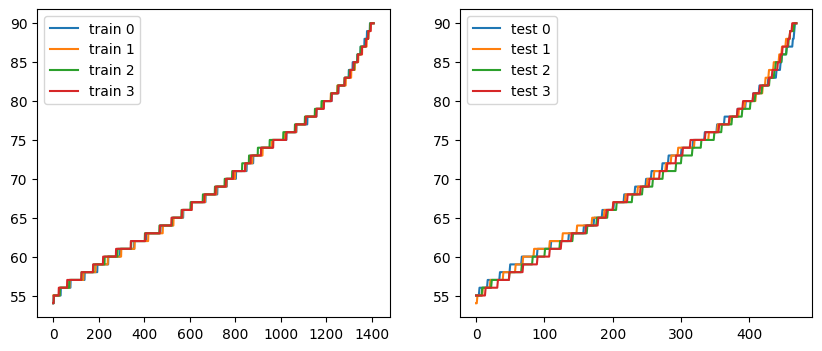

In [77]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

pd.DataFrame({
    'train 0': [int(x) for x in sorted(train_fold_data[0]['nsrr_age'].values)],
    'train 1': [int(x) for x in sorted(train_fold_data[1]['nsrr_age'].values)],
    'train 2': [int(x) for x in sorted(train_fold_data[2]['nsrr_age'].values)],
    'train 3': [int(x) for x in sorted(train_fold_data[3]['nsrr_age'].values)]
}).plot(ax=ax1)

pd.DataFrame({
    'test 0': [int(x) for x in sorted(test_fold_data[0]['nsrr_age'].values)],
    'test 1': [int(x) for x in sorted(test_fold_data[1]['nsrr_age'].values)],
    'test 2': [int(x) for x in sorted(test_fold_data[2]['nsrr_age'].values)],
    'test 3': [int(x) for x in sorted(test_fold_data[3]['nsrr_age'].values)]
}).plot(ax=ax2)

<Axes: >

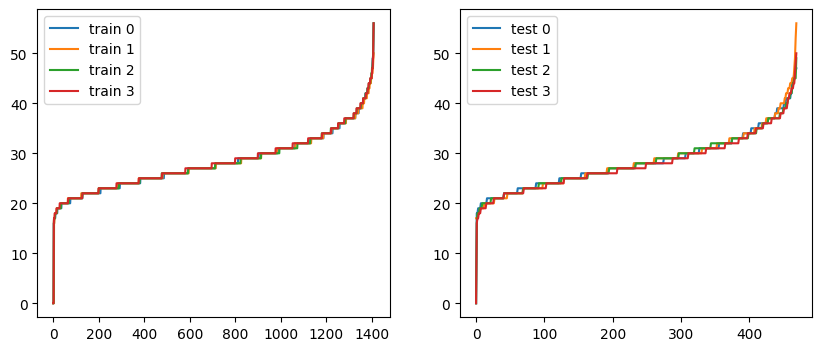

In [81]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

pd.DataFrame({
    'train 0': sorted([to_int(x) for x in train_fold_data[0]['nsrr_bmi'].values]),
    'train 1': sorted([to_int(x) for x in train_fold_data[1]['nsrr_bmi'].values]),
    'train 2': sorted([to_int(x) for x in train_fold_data[2]['nsrr_bmi'].values]),
    'train 3': sorted([to_int(x) for x in train_fold_data[3]['nsrr_bmi'].values])
}).plot(ax=ax1)

pd.DataFrame({
    'test 0': sorted([to_int(x) for x in test_fold_data[0]['nsrr_bmi'].values]),
    'test 1': sorted([to_int(x) for x in test_fold_data[1]['nsrr_bmi'].values]),
    'test 2': sorted([to_int(x) for x in test_fold_data[2]['nsrr_bmi'].values]),
    'test 3': sorted([to_int(x) for x in test_fold_data[3]['nsrr_bmi'].values])
}).plot(ax=ax2)

<Axes: >

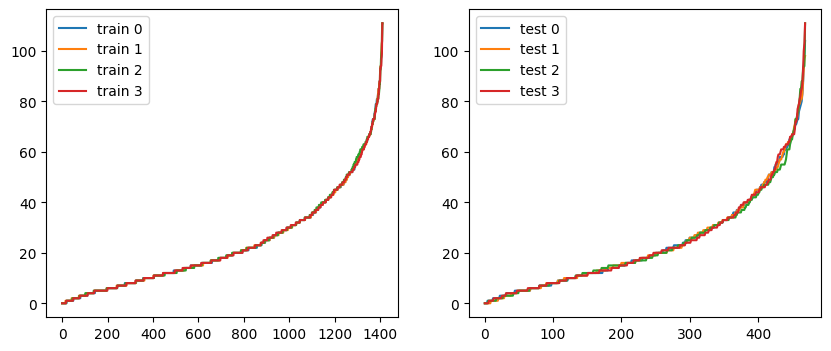

In [82]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

pd.DataFrame({
    'train 0': sorted([to_int(x) for x in train_fold_data[0]['nsrr_ahi'].values]),
    'train 1': sorted([to_int(x) for x in train_fold_data[1]['nsrr_ahi'].values]),
    'train 2': sorted([to_int(x) for x in train_fold_data[2]['nsrr_ahi'].values]),
    'train 3': sorted([to_int(x) for x in train_fold_data[3]['nsrr_ahi'].values])
}).plot(ax=ax1)

pd.DataFrame({
    'test 0': sorted([to_int(x) for x in test_fold_data[0]['nsrr_ahi'].values]),
    'test 1': sorted([to_int(x) for x in test_fold_data[1]['nsrr_ahi'].values]),
    'test 2': sorted([to_int(x) for x in test_fold_data[2]['nsrr_ahi'].values]),
    'test 3': sorted([to_int(x) for x in test_fold_data[3]['nsrr_ahi'].values])
}).plot(ax=ax2)

<Axes: >

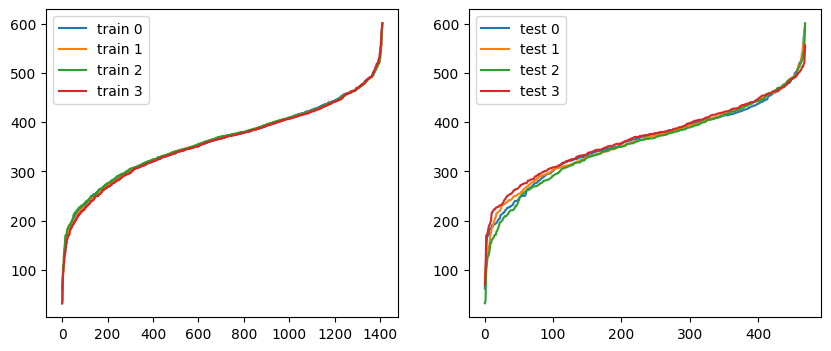

In [83]:
def to_int(x):
    try:
        return int(x)
    except:
        return 0

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

pd.DataFrame({
    'train 0': sorted([to_int(x) for x in train_fold_data[0]['nsrr_tst'].values]),
    'train 1': sorted([to_int(x) for x in train_fold_data[1]['nsrr_tst'].values]),
    'train 2': sorted([to_int(x) for x in train_fold_data[2]['nsrr_tst'].values]),
    'train 3': sorted([to_int(x) for x in train_fold_data[3]['nsrr_tst'].values])
}).plot(ax=ax1)

pd.DataFrame({
    'test 0': sorted([to_int(x) for x in test_fold_data[0]['nsrr_tst'].values]),
    'test 1': sorted([to_int(x) for x in test_fold_data[1]['nsrr_tst'].values]),
    'test 2': sorted([to_int(x) for x in test_fold_data[2]['nsrr_tst'].values]),
    'test 3': sorted([to_int(x) for x in test_fold_data[3]['nsrr_tst'].values])
}).plot(ax=ax2)